In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [2]:
#I assigned the image to the variable with the cv2 library
img= cv2.imread ("sentinel-2-bgrnir.tif")

In [ ]:
#I divided the image into 3 bands as red green blue

img= cv2.imread ("sentinel-2-bgrnir.tif")
cv2.imshow("image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

img_Red = img[:,:,2]
img_Green = img[:,:,1]
img_Blue = img[:,:,0]

plt.subplot(1,3,1),plt.imshow(img_Red,"gray"),plt.title("RED");
plt.subplot(1,3,2),plt.imshow(img_Green,"gray"),plt.title("GREEN");
plt.subplot(1,3,3),plt.imshow(img_Blue,"gray"),plt.title("BLUE");
plt.show;




In [56]:
single_band

array([[5, 5, 5, ..., 3, 3, 3],
       [5, 5, 5, ..., 3, 3, 3],
       [5, 5, 5, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 4, 4, 4],
       [3, 3, 3, ..., 4, 4, 4],
       [3, 3, 3, ..., 4, 4, 4]], dtype=uint8)

In [57]:
# BVout=BVin-BVmean

In [58]:
#mean filter 
mean_filter = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

In [59]:
#find BVmean
def convelve2d(image,kernel):
    
    
    
    output=np.zeros_like(image)
    
    image_padded = np.zeros((image.shape[0]+2,image.shape[1]+2))
    image_padded[1:-1,1:-1] = image
    
    
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            
            output[y,x] = (1/9*kernel*image_padded[y:y+3,x:x+3]).sum()
            

    return output 

In [60]:
#output of bvmean
image_mean=convelve2d(red_band,mean_filter)
cv2.imshow("filter1toimage1",image_mean)
cv2.waitKey(0)
cv2.destroyAllWindows()

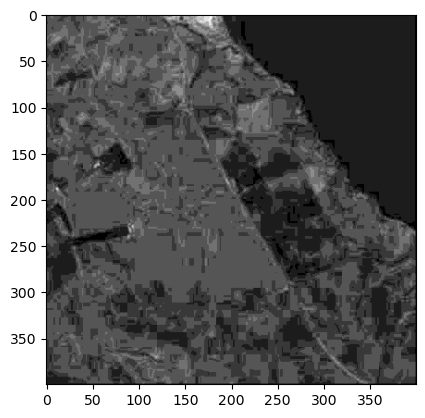

In [63]:
#We find bv out by subtracting the mean image from the red band

BVout= red_band-image_mean
BVout
plt.imshow(BVout,"gray")

In [ ]:
#define the kernel

In [21]:
Vertical = np.array([[-1,0,1]
                    ,[-1,0,1]
                    ,[-1,0,1]])


Horizontal = np.array([[-1,-1,-1]
                       ,[0,0,0],
                       [1,1,1]])


Diagonal_NW_SE  = np.array([[0,1,1],
                    [-1,0,1],
                    [-1,-1,0]])


Diagonal_NE_SW = np.array([[1,1,0],
                    [1,0,-1],
                    [0,-1,-1]])

In [23]:
#I assigned the kernel using to a function


def convelve2d(image,kernel):
    
    output=np.zeros_like(image)
    
    image_padded = np.zeros((image.shape[0]+2,image.shape[1]+2))
    image_padded[1:-1,1:-1] = image
    
    
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            
            output[y,x] = (kernel*image_padded[y:y+3,x:x+3]).sum()
            

    return output 

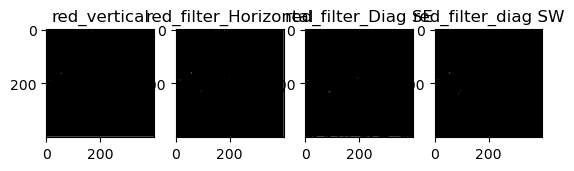

In [65]:
#I implemented all the kernels in a row in the red band using the function
#and save the images
image_vertical=convelve2d(red_band,kernel_vertical)
cv2.imshow("filter1toimage1",image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

image_horizontal=convelve2d(red_band,kernel_horizontal)
cv2.imshow("filter1toimage1",image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

image_diagonalse=convelve2d(red_band,kernel_diagonalse)
cv2.imshow("filter1toimage1",image3)
cv2.waitKey(0)
cv2.destroyAllWindows()

image_diagonalsw=convelve2d(red_band,kernel_diagonalsw)
cv2.imshow("filter1toimage1",image4)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.subplot(1,4,1),plt.imshow(image_vertical,"gray"),plt.title("red_vertical");
plt.subplot(1,4,2),plt.imshow(image_horizontal,"gray"),plt.title("red_filter_Horizontal");
plt.subplot(1,4,3),plt.imshow(image_diagonalse,"gray"),plt.title("red_filter_Diag SE");
plt.subplot(1,4,4),plt.imshow(image_diagonalsw,"gray"),plt.title("red_filter_diag SW");

plt.show;


In [52]:
#I combined all the images I get output
combine=image_vertical+image_horizontal+image_diagonalse+image_diagonalsw

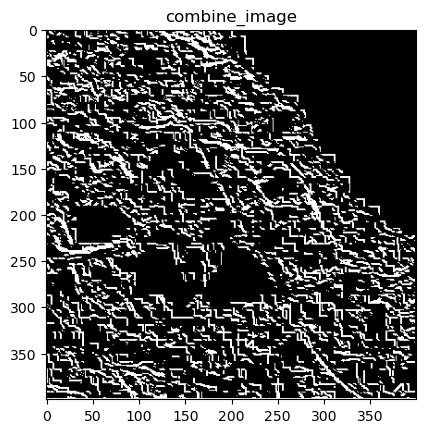

In [42]:
#combine images
plt.imshow(combine,"gray"),plt.title("combine_image");

In [53]:
#I write a function to apply threshold

h = combine.shape[0]
w = combine.shape[1]

img_thres = np.zeros((h,w))

n_pix = 0
T = 90

for y in range(0,h):
    for x in range(0,w):
        pixel = combine[y,x]
        if pixel >= T:
            n_pix = 255
        else:
            n_pix = 0
            
        img_thres[y,x] = n_pix

cv2.imshow("img_thres", img_thres)
cv2.waitKey(0)
cv2.destroyAllWindows()


True

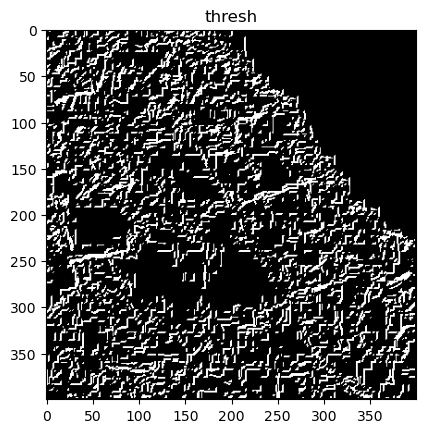

In [50]:
#I applied the threshold that I thought was suitable for the image I combined.
plt.imshow(img_thres,"gray"),plt.title("thresh");
cv2.imwrite("combine.jpg",img_thres)